In [2]:
from acm.hod import BoxHOD
from acm.utils import setup_logging
import numpy as np
from pathlib import Path
import pandas

setup_logging()

def get_hod_params(nrows=None):
    """Some example HOD parameters."""
    hod_dir = Path(f'/pscratch/sd/e/epaillas/emc/hod_params/yuan23/')
    hod_fn = hod_dir / f'hod_params_yuan23_c000.csv'
    df = pandas.read_csv(hod_fn, delimiter=',')
    df.columns = df.columns.str.strip()
    df.columns = list(df.columns.str.strip('# ').values)
    return df.to_dict('list')


# read example HOD parameters
hod_params = get_hod_params()

# load abacusHOD class
abacus = BoxHOD(varied_params=hod_params.keys(),
                   sim_type='base', redshift=0.5,
                   cosmo_idx=0, phase_idx=0)

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/asdf/entry_points.py:46: AsdfWarning: asdf.extensions plugin from package asdf-astropy==0.6.1 failed to load:

KeyError: 'Resource unavailable for URI: asdf://asdf-format.org/transform/manifests/transform-1.6.0'
  warnings.warn(


Loading simulation by slab,  0
Loading simulation by slab,  1
Loading simulation by slab,  2
Loading simulation by slab,  3
Loading simulation by slab,  4
Loading simulation by slab,  5
Loading simulation by slab,  6
Loading simulation by slab,  7
Loading simulation by slab,  8
Loading simulation by slab,  9
Loading simulation by slab,  10
Loading simulation by slab,  11
Loading simulation by slab,  12
Loading simulation by slab,  13
Loading simulation by slab,  14
Loading simulation by slab,  15
Loading simulation by slab,  16
Loading simulation by slab,  17
Loading simulation by slab,  18
Loading simulation by slab,  19
Loading simulation by slab,  20
Loading simulation by slab,  21
Loading simulation by slab,  22
Loading simulation by slab,  23
Loading simulation by slab,  24
Loading simulation by slab,  25
Loading simulation by slab,  26
Loading simulation by slab,  27
Loading simulation by slab,  28
Loading simulation by slab,  29
Loading simulation by slab,  30
Loading simulation

### Sample the first 10 HODs from our list

In [3]:
hod_positions = []
for i in range(10):
    hod = {key: hod_params[key][i] for key in hod_params.keys()}
    hod_dict = abacus.run(hod, nthreads=16, add_rsd=True, tracer_density_mean=5e-4)['LRG']
    pos = np.c_[hod_dict['X'], hod_dict['Y'], hod_dict['Z_RSD']]
    hod_positions.append(pos)

gen mocks 28.168506860733032
gen mocks 0.5980808734893799
gen mocks 0.7055332660675049
gen mocks 0.8341400623321533
gen mocks 0.7569875717163086
gen mocks 0.5133905410766602
gen mocks 0.4456636905670166
gen mocks 0.6764030456542969
gen mocks 0.4202895164489746
gen mocks 0.4216163158416748


### Let's have a look at the clustering to ensure everything is sensible

[000171.70]  01-08 08:57  TwoPointCorrelationFunction  INFO     Using estimator <class 'pycorr.twopoint_estimator.NaturalTwoPointEstimator'>.
[000171.70]  01-08 08:57  TwoPointCorrelationFunction  INFO     Running auto-correlation.
[000171.70]  01-08 08:57  TwoPointCorrelationFunction  INFO     Computing two-point counts D1D2.
[000172.18]  01-08 08:57  TwoPointCorrelationFunction  INFO     Analytically computing two-point counts R1R2.
[000172.18]  01-08 08:57  TwoPointCorrelationFunction  INFO     Correlation function computed in elapsed time 0.48 s.
[000172.19]  01-08 08:57  TwoPointCorrelationFunction  INFO     Using estimator <class 'pycorr.twopoint_estimator.NaturalTwoPointEstimator'>.
[000172.19]  01-08 08:57  TwoPointCorrelationFunction  INFO     Running auto-correlation.
[000172.19]  01-08 08:57  TwoPointCorrelationFunction  INFO     Computing two-point counts D1D2.
[000184.15]  01-08 08:57  TwoPointCorrelationFunction  INFO     Analytically computing two-point counts R1R2.
[000

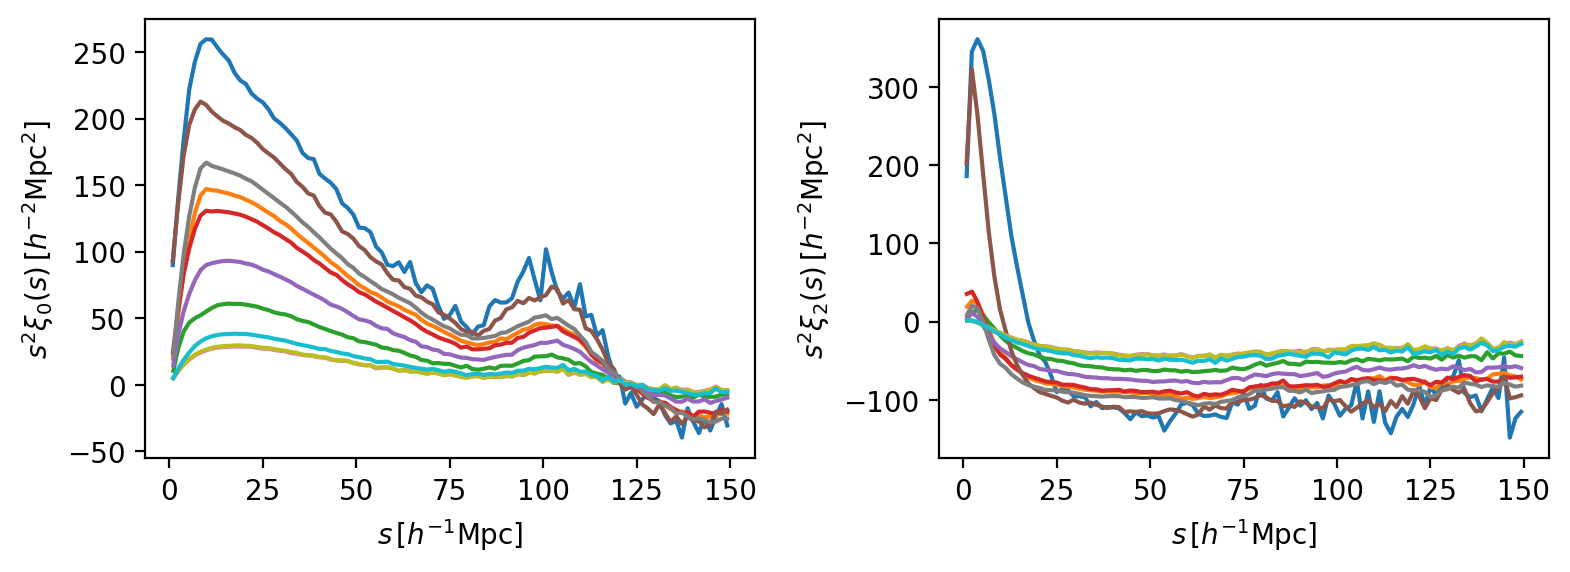

In [4]:
from pycorr import TwoPointCorrelationFunction
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

sedges = np.linspace(0, 150, 100)
muedges = np.linspace(-1, 1, 241)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

for i in range(10):
    pos = hod_positions[i]
    result = TwoPointCorrelationFunction(data_positions1=pos, boxsize=abacus.boxsize,
                                        mode='smu', edges=(sedges, muedges), los='z',
                                        nthreads=16, position_type='pos')
    s, multipoles = result(ells=(0, 2, 4), return_sep=True)
    ax[0].plot(s, s**2*multipoles[0])
    ax[1].plot(s, s**2*multipoles[1])
    
ax[0].set_xlabel(r'$s\, [h^{-1}{\rm Mpc}]$')
ax[1].set_xlabel(r'$s\, [h^{-1}{\rm Mpc}]$')
ax[0].set_ylabel(r'$s^2 \xi_0(s)\,[h^{-2}{\rm Mpc^2}]$')
ax[1].set_ylabel(r'$s^2 \xi_2(s)\,[h^{-2}{\rm Mpc^2}]$')
plt.tight_layout()
plt.show()

In [1]:
from acm.hod import LightconeHOD
from acm.utils import setup_logging
import numpy as np
from pathlib import Path
import pandas

setup_logging()

def get_hod_params(nrows=None):
    """Some example HOD parameters."""
    hod_dir = Path(f'/pscratch/sd/e/epaillas/emc/hod_params/yuan23/')
    hod_fn = hod_dir / f'hod_params_yuan23_c000.csv'
    df = pandas.read_csv(hod_fn, delimiter=',')
    df.columns = df.columns.str.strip()
    df.columns = list(df.columns.str.strip('# ').values)
    return df.to_dict('list')


# read example HOD parameters
hod_params = get_hod_params()

# load abacusHOD class
abacus = LightconeHOD(varied_params=hod_params.keys(),
                zrange=(0.4, 0.6), cosmo_idx=0, phase_idx=0)

2024-07-23 17:45:07.229377: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


[000000.07]  07-23 17:45  LightconeHOD                 INFO     Lightcone composed of snapshots at z: [0.4, 0.45, 0.5, 0.575, 0.65].


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/asdf/entry_points.py:46: AsdfWarning: asdf.extensions plugin from package asdf-astropy==0.6.1 failed to load:

KeyError: 'Resource unavailable for URI: asdf://asdf-format.org/transform/manifests/transform-1.6.0'
  warnings.warn(


Loading simulation by slab,  0
sorting halos for conformity calculation
Loading simulation by slab,  0
sorting halos for conformity calculation
Loading simulation by slab,  0
sorting halos for conformity calculation
Loading simulation by slab,  0
sorting halos for conformity calculation
Loading simulation by slab,  0
sorting halos for conformity calculation
[000028.51]  07-23 17:45  LightconeHOD                 INFO     Processing AbacusSummit_base_c000_ph000 at zrange = (0.4, 0.6)
[000028.51]  07-23 17:45  LightconeHOD                 INFO     Varied parameters: ['logM_cut', 'logM1', 'sigma', 'alpha', 'kappa', 'alpha_c', 'alpha_s', 's', 'Acent', 'Asat', 'Bcent', 'Bsat'].
[000028.51]  07-23 17:45  LightconeHOD                 INFO     Default parameters: {'s_v': 0, 's_p': 0, 's_r': 0, 'ic': 1.0}.


In [19]:
hod = {key: hod_params[key][466] for key in hod_params.keys()}

hod_dict, randoms_dict = abacus.run(hod, nthreads=16, full_sky=True, make_randoms=True, apply_nz=True, alpha_rand=5)

gen mocks 0.03718066215515137
gen mocks 0.0320744514465332
gen mocks 0.03724193572998047
gen mocks 0.052364349365234375
gen mocks 0.05679011344909668
[000048.61]  07-23 17:51  LightconeHOD                 INFO     Applying redshift cut: 0.4 < z < 0.6.
[000048.71]  07-23 17:51  LightconeHOD                 INFO     Raw data nbar: 0.0006247304346341545
[000048.71]  07-23 17:51  LightconeHOD                 INFO     Applying radial mask from /global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v1.5/LRG_NGC_nz.txt.
[000050.43]  07-23 17:51  LightconeHOD                 INFO     Downsampled data nbar: 0.0005199265044782844
[000050.43]  07-23 17:51  LightconeHOD                 INFO     Generating random catalog.
[000078.73]  07-23 17:52  LightconeHOD                 INFO     Applying radial mask from /global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v1.5/LRG_NGC_nz.txt.


In [20]:
alpha = len(randoms_dict['LRG']['RA'])/len(hod_dict['LRG']['RA'])
print(alpha)

4.417798634162719


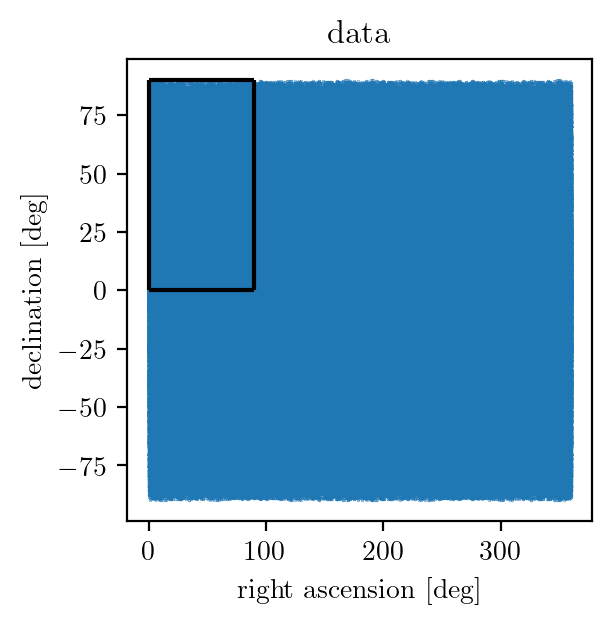

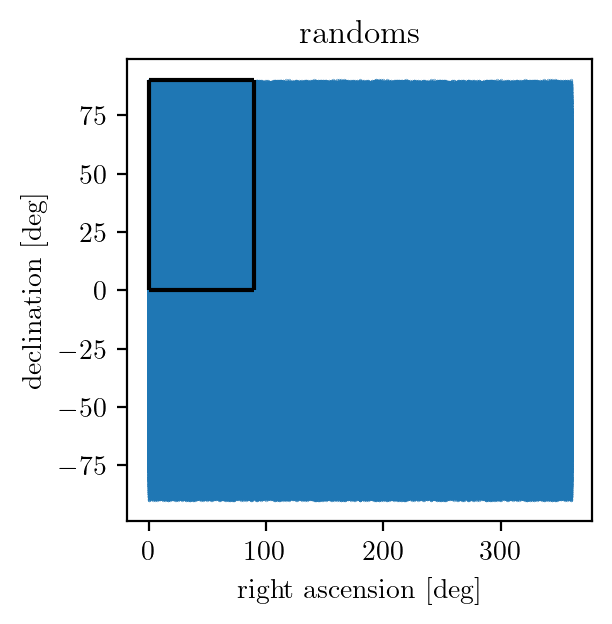

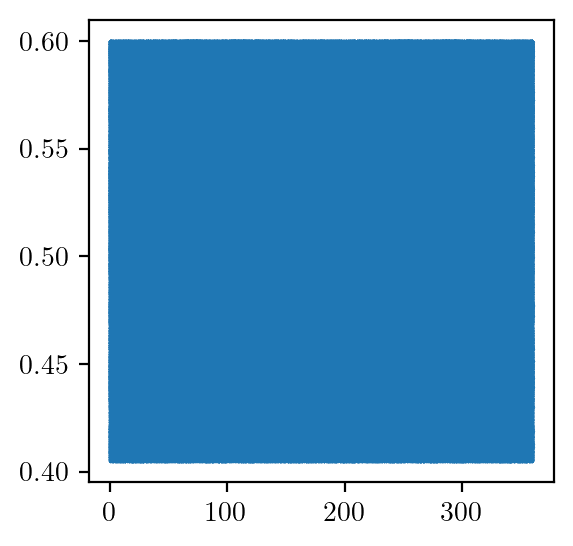

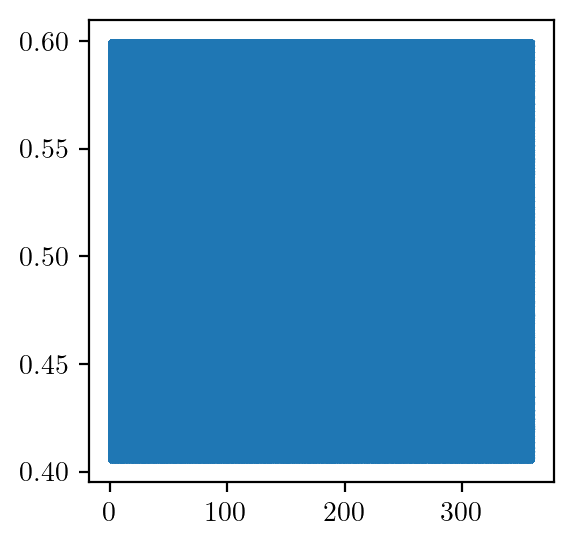

0.0 359.9997660628104


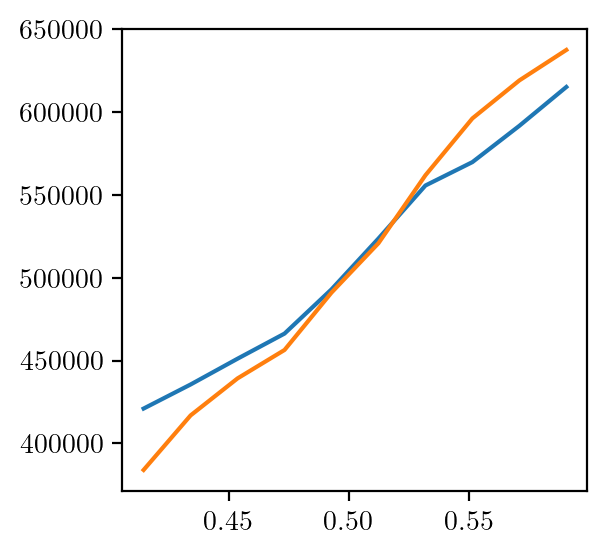

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(hod_dict['LRG']['RA'], hod_dict['LRG']['DEC'], marker='.', s=0.1)
ax.vlines(90, 0, 90, color='k')
ax.vlines(0, 0, 90, color='k')
ax.hlines(90, 0, 90, color='k')
ax.hlines(0, 0, 90, color='k')
ax.set_xlabel(r'\textrm{right ascension [deg]}')
ax.set_ylabel(r'\textrm{declination [deg]}')
ax.set_title('data')
plt.show()

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(randoms_dict['LRG']['RA'], randoms_dict['LRG']['DEC'], marker='.', s=0.1)
ax.vlines(90, 0, 90, color='k')
ax.vlines(0, 0, 90, color='k')
ax.hlines(90, 0, 90, color='k')
ax.hlines(0, 0, 90, color='k')
ax.set_xlabel(r'\textrm{right ascension [deg]}')
ax.set_ylabel(r'\textrm{declination [deg]}')
ax.set_title('randoms')
# ax.set_xlim(0, 92)
# ax.set_ylim(0, 92)
plt.show()

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(hod_dict['LRG']['RA'], hod_dict['LRG']['Z'], marker='.', s=0.1)
plt.show()

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(randoms_dict['LRG']['RA'], randoms_dict['LRG']['Z'], marker='.', s=0.1)
plt.show()

print(hod_dict['LRG']['RA'].min(), hod_dict['LRG']['RA'].max())
# print(hod_dict['LRG']['Z'].min(), hod_dict['LRG']['Z'].max())

fig, ax = plt.subplots(figsize=(3, 3))
hist, bin_edges = np.histogram(hod_dict['LRG']['Z'])
bin_centres = (bin_edges[1:] + bin_edges[:-1]) / 2
ax.plot(bin_centres, hist)

hist, bin_edges = np.histogram(randoms_dict['LRG']['Z'])
bin_centres = (bin_edges[1:] + bin_edges[:-1]) / 2
ax.plot(bin_centres, hist / alpha)
plt.show()

# ax.hist(randoms_dict['LRG']['Z'], alpha=0.5)
# plt.show()

# fig, ax = plt.subplots(figsize=(3, 3))
# ax.scatter(hod_dict['LRG']['y'], hod_dict['LRG']['z'], marker='.', s=0.1)
# plt.show()

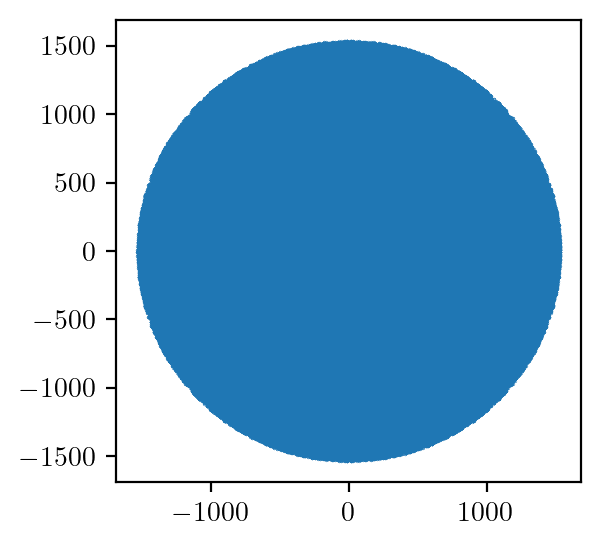

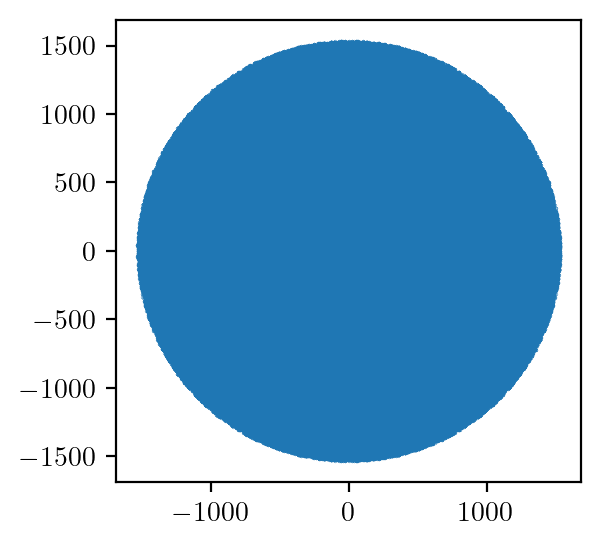

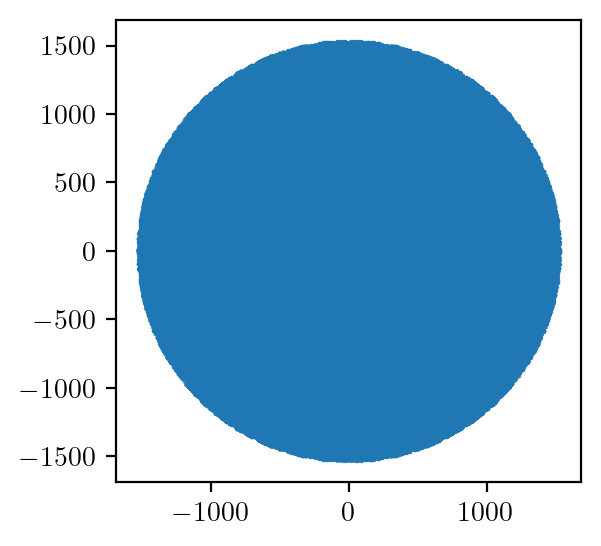

-1534.2169025448388 1534.2169025448388
-1534.5162717883925 1534.5162717883925
-1533.6951536502147 1533.6951536502147


In [8]:
from cosmoprimo.fiducial import AbacusSummit
from mockfactory import sky_to_cartesian
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


cosmo = AbacusSummit()
data_dist = cosmo.comoving_radial_distance(hod_dict['LRG']['Z'])
data_positions = sky_to_cartesian(dist=data_dist,
                                  ra=hod_dict['LRG']['RA'],
                                  dec=hod_dict['LRG']['DEC'])


fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(data_positions[:, 0], data_positions[:, 1], marker='.', s=0.1)
# ax.scatter(np.concatenate([hod_dict['LRG']['X'], -hod_dict['LRG']['X']]), np.concatenate([hod_dict['LRG']['Y'], -hod_dict['LRG']['Y']]), marker='.', s=0.1)
plt.show()

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(data_positions[:, 0], data_positions[:, 2], marker='.', s=0.1)
plt.show()

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(data_positions[:, 1], data_positions[:, 2], marker='.', s=0.1)
plt.show()

print(data_positions[:, 0].min(), data_positions[:, 0].max())
print(data_positions[:, 1].min(), data_positions[:, 1].max())
print(data_positions[:, 2].min(), data_positions[:, 2].max())

In [22]:
from mockfactory.desi import is_in_desi_footprint

data_mask = is_in_desi_footprint(
    ra=hod_dict['LRG']['RA'],
    dec=hod_dict['LRG']['DEC'],
    release='y1'
)

randoms_mask = is_in_desi_footprint(
    ra=randoms_dict['LRG']['RA'],
    dec=randoms_dict['LRG']['DEC'],
    release='y1'
)

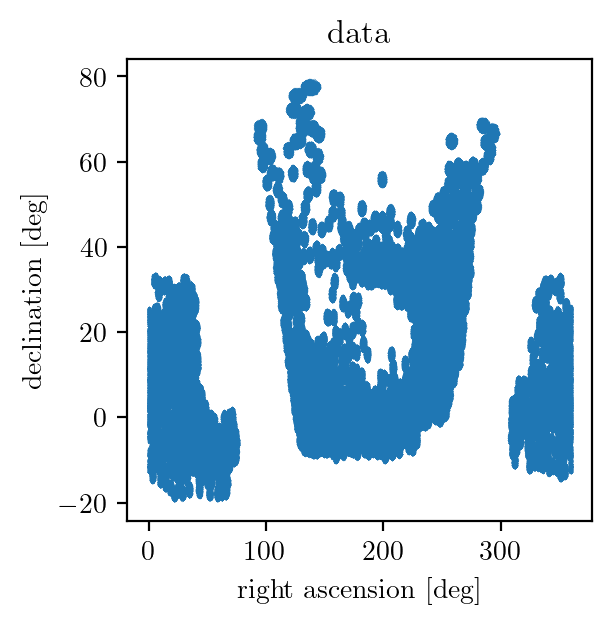

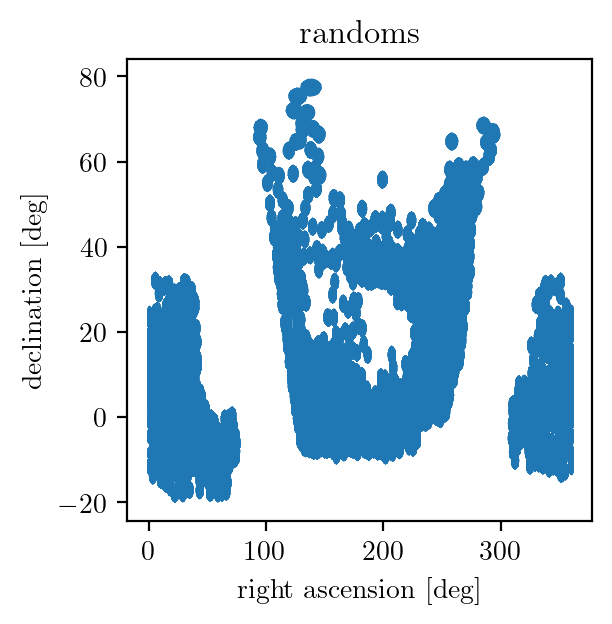

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(hod_dict['LRG']['RA'][data_mask], hod_dict['LRG']['DEC'][data_mask], marker='.', s=0.1)
ax.set_xlabel(r'\textrm{right ascension [deg]}')
ax.set_ylabel(r'\textrm{declination [deg]}')
# ax.set_xlim(0, 92)
ax.set_title('data')
plt.show()

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(randoms_dict['LRG']['RA'][randoms_mask], randoms_dict['LRG']['DEC'][randoms_mask], marker='.', s=0.1)
ax.set_xlabel(r'\textrm{right ascension [deg]}')
ax.set_ylabel(r'\textrm{declination [deg]}')
# ax.set_xlim(0, 92)
ax.set_title('randoms')
plt.show()

ndata = len(hod_dict['LRG']['RA'][data_mask])

In [24]:
from mockfactory.utils import sky_to_cartesian
from cosmoprimo.fiducial import AbacusSummit
from pycorr import TwoPointCorrelationFunction, setup_logging
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

setup_logging()

sedges = np.linspace(0, 150, 100)
muedges = np.linspace(-1, 1, 241)

cosmo = AbacusSummit(0)

data_dist = cosmo.comoving_radial_distance(hod_dict['LRG']['Z'])
data_positions = sky_to_cartesian(dist=data_dist[data_mask],
                                  ra=hod_dict['LRG']['RA'][data_mask],
                                  dec=hod_dict['LRG']['DEC'][data_mask])

randoms_dist = cosmo.comoving_radial_distance(randoms_dict['LRG']['Z'])
randoms_positions = sky_to_cartesian(dist=randoms_dist[randoms_mask],
                                     ra=randoms_dict['LRG']['RA'][randoms_mask],
                                     dec=randoms_dict['LRG']['DEC'][randoms_mask])

result = TwoPointCorrelationFunction(data_positions1=data_positions, randoms_positions1=randoms_positions,
                                     mode='smu', edges=(sedges, muedges), los='midpoint', estimator='landyszalay',
                                     nthreads=128, position_type='pos')

[000005.65]  07-23 17:54  TwoPointCorrelationFunction  INFO     Using estimator <class 'pycorr.twopoint_estimator.LandySzalayTwoPointEstimator'>.
[000005.65]  07-23 17:54  TwoPointCorrelationFunction  INFO     Running auto-correlation.
[000005.65]  07-23 17:54  TwoPointCorrelationFunction  INFO     Computing two-point counts D1D2.
[000006.22]  07-23 17:54  TwoPointCorrelationFunction  INFO     Computing two-point counts D1R2.
[000009.82]  07-23 17:54  TwoPointCorrelationFunction  INFO     Computing two-point counts R1R2.
[000017.86]  07-23 17:54  TwoPointCorrelationFunction  INFO     Correlation function computed in elapsed time 12.21 s.


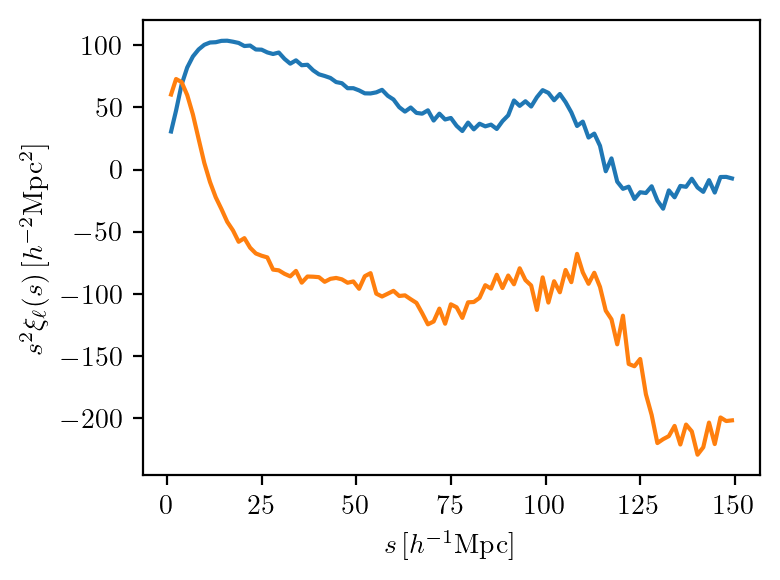

In [25]:
s, multipoles = result(ells=(0, 2), return_sep=True)
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(s, s**2 * multipoles[0])
ax.plot(s, s**2 * multipoles[1])
ax.set_xlabel(r'$s\, [h^{-1}{\rm Mpc}]$')
ax.set_ylabel(r'$s^2 \xi_\ell(s)\,[h^{-2}{\rm Mpc^2}]$')
plt.tight_layout()
plt.show()
plt.show()

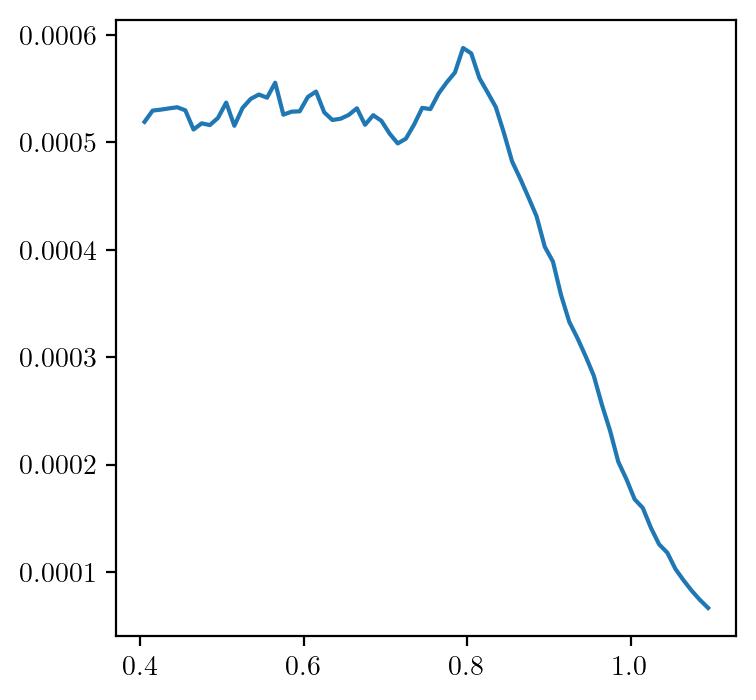

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


nz_fn = '/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v1.5/LRG_NGC_nz.txt'
data = np.genfromtxt(nz_fn, skip_header=3)

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(data[:, 0], data[:, 3])
plt.show()

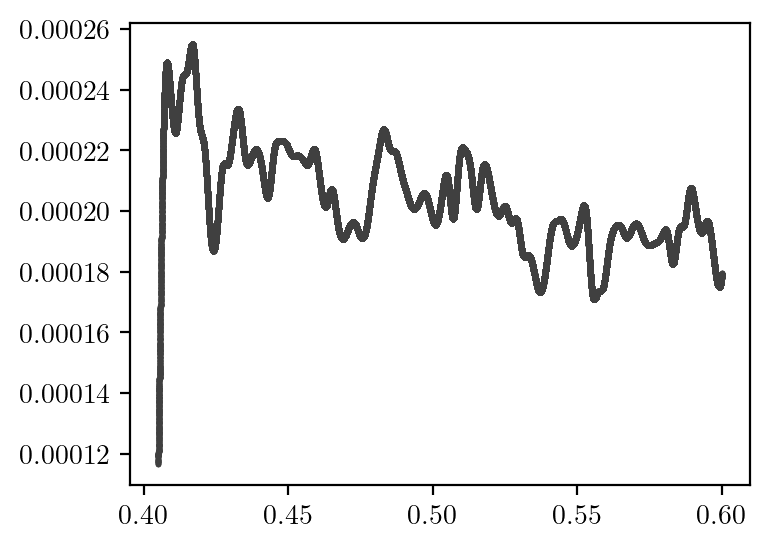

In [4]:
import numpy as np
from cosmoprimo.fiducial import AbacusSummit
import healpy as hp
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')



def spl_nofz(zarray, fsky, cosmo, zmin, zmax, Nzbins=100):
    zbins = np.linspace(zmin, zmax, Nzbins+1)
    Nz, zbins = np.histogram(zarray, zbins)

    zmid = zbins[0:-1] + (zmax-zmin)/Nzbins/2.0
    # set z range boundaries to be zmin and zmax and avoid the interpolation error
    zmid[0], zmid[-1] = zbins[0], zbins[-1]

    rmin = cosmo.comoving_radial_distance(zbins[0:-1])
    rmax = cosmo.comoving_radial_distance(zbins[1:])

    vol = fsky * 4./3*np.pi * (rmax**3.0 - rmin**3.0)
    nz_array = Nz/vol
    spl_nz = InterpolatedUnivariateSpline(zmid, nz_array)
    return spl_nz

def sky_fraction(randoms_fn):
    """Compute the sky fraction of a randoms catalogue."""
    data = np.genfromtxt(randoms_fn)
    ra = data[:, 0]
    dec = data[:, 1]
    nside = 512
    npix = hp.nside2npix(nside)
    phi = np.radians(ra)
    theta = np.radians(90.0 - dec)
    pixel_indices = hp.ang2pix(nside, theta, phi)
    pixel_unique, counts = np.unique(pixel_indices, return_counts=True)
    fsky = len(pixel_unique)/npix
    return fsky

fsky = 0.125
cosmo = AbacusSummit(0)
zmin, zmax = 0.4, 0.6

z = hod_dict['LRG']['Z']

fig, ax = plt.subplots(figsize=(4, 3))
nz = spl_nofz(z, fsky, cosmo, zmin, zmax)
ax.scatter(z, nz(z), s=1.0, c='#404040',)
plt.show()